# Wine Quality Prediction

## Dataset Description

This datasets is related to red variants of the Portuguese "Vinho Verde" wine. The dataset describes the amount of various chemicals present in wine and their effect on it's quality. The datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones). The task is to predict the quality of wine using the given data.

Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009].
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  In the above reference, two datasets were created, using red and white wine samples.
  The inputs include objective tests (e.g. PH values) and the output is based on sensory data
  (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality
  between 0 (very bad) and 10 (very excellent). Several data mining methods were applied to model
  these datasets under a regression approach. The support vector machine model achieved the
  best results. Several metrics were computed: MAD, confusion matrix for a fixed error tolerance (T),
  etc. Also, we plot the relative importances of the input variables (as measured by a sensitivity
  analysis procedure).

4. Relevant Information:

   The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
   For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
   Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables
   are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

   These datasets can be viewed as classification or regression tasks.
   The classes are ordered and not balanced (e.g. there are munch more normal wines than
   excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
   or poor wines. Also, we are not sure if all input variables are relevant. So
   it could be interesting to test feature selection methods.

5. Number of Instances: red wine - 1599; white wine - 4898.

6. Number of Attributes: 11 + output attribute
  
   Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
   feature selection.

7. Attribute information:

   It has 13 colomns explaind below are based on physicochemical tests.
   There are in the section below.
   For more information, read [Cortez et al., 2009].

8. Missing Attribute Values: None

9. Aim: find a model that is useful to support the oenologist wine tasting evaluations and improve wine production.


## Columns

1. **fixed acidity**: Acids that do not evaporate easily / Acidi che non evaporano facilmente
2. **volatile acidity**: Acids that evaporate quickly and can give a vinegar-like smell / Acidi che evaporano velocemente e possono dare un odore simile all'aceto
3. **citric acid**: A weak acid found in citrus fruits, adding freshness / Un acido debole presente negli agrumi, che aggiunge freschezza
4. **residual sugar**: Sugar left after fermentation, giving sweetness / Zucchero rimasto dopo la fermentazione, che conferisce dolcezza
5. **chlorides**: Salt compounds that can affect the wine's taste and mouthfeel / Composti di sale che possono influenzare il sapore e la consistenza del vino
6. **free sulfur dioxide**: Preservative that protects wine from oxidation / Conservante che protegge il vino dall'ossidazione
7. **total sulfur dioxide**: The total amount of sulfur compounds, both free and bound / La quantità totale di composti di zolfo, sia liberi che legati
8. **density**: The mass of wine per unit volume, related to alcohol and sugar content / La massa del vino per unità di volume, legata al contenuto di alcol e zucchero
9. **pH**: Measure of acidity or alkalinity, affecting freshness and stability / Misura dell'acidità o alcalinità, che influisce sulla freschezza e stabilità
10. **sulphates**: Compounds that can enhance the preservation and stability of the wine / Composti che possono migliorare la conservazione e la stabilità del vino
11. **alcohol**: The ethanol content in the wine, influencing body and flavor / Il contenuto di etanolo nel vino, che influenza corpo e sapore
12. **quality**: The overall assessment of the wine's characteristics and balance / La valutazione complessiva delle caratteristiche e dell'equilibrio del vino (score between 0 and 10)
13. **id**: A unique identifier for tracking the wine / Un identificatore univoco per tracciare il vino

## Objective
- Understand the Dataset & cleanup (if required).
- Build classification models to predict the wine quality.
- Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.

## Licence
CC0: Public Domain

## Update Frequency
Annually (Updated 3 years ago)

# Prediction

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os.path
import seaborn as sns
%matplotlib inline

In [39]:
# Load the raw file from my repo

DATA_URL_RED = "https://raw.githubusercontent.com/elvisperlika/Wine-Quality-Prediction/main/winequality-red.csv"

if not os.path.exists("red.csv"):
    from urllib.request import urlretrieve
    urlretrieve(DATA_URL_RED, "red.csv")

DATA_URL_WHITE = "https://raw.githubusercontent.com/elvisperlika/Wine-Quality-Prediction/main/winequality-white.csv"

if not os.path.exists("white.csv"):
    from urllib.request import urlretrieve
    urlretrieve(DATA_URL_WHITE, "white.csv")

In [40]:
red = pd.read_csv('red.csv', sep=';')
white = pd.read_csv('white.csv', sep=';')

In [41]:
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [42]:
white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [43]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [44]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


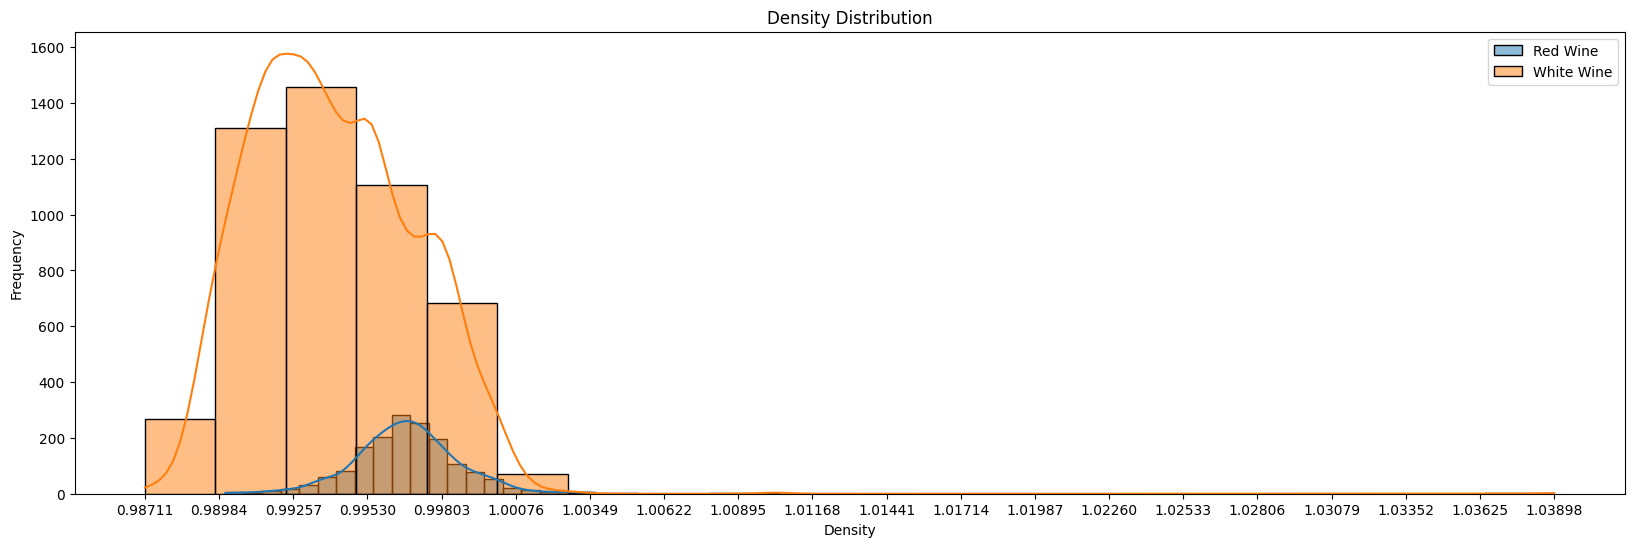

In [46]:
plt.figure(figsize=(20, 6))
sns.histplot(red["density"], bins=20, alpha=0.5, label='Red Wine', kde=True)
sns.histplot(white["density"], bins=20, alpha=0.5, label='White Wine', kde=True)

x_ticks = np.linspace(min(red["density"].min(), white["density"].min()),
                      max(red["density"].max(), white["density"].max()), 20)
plt.xticks(x_ticks)

plt.legend()

plt.title("Density Distribution")
plt.xlabel("Density")
plt.ylabel("Frequency")
plt.show()

<ipython-input-45-789f34362194>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{int(tick * 100)}%' for tick in yticks])


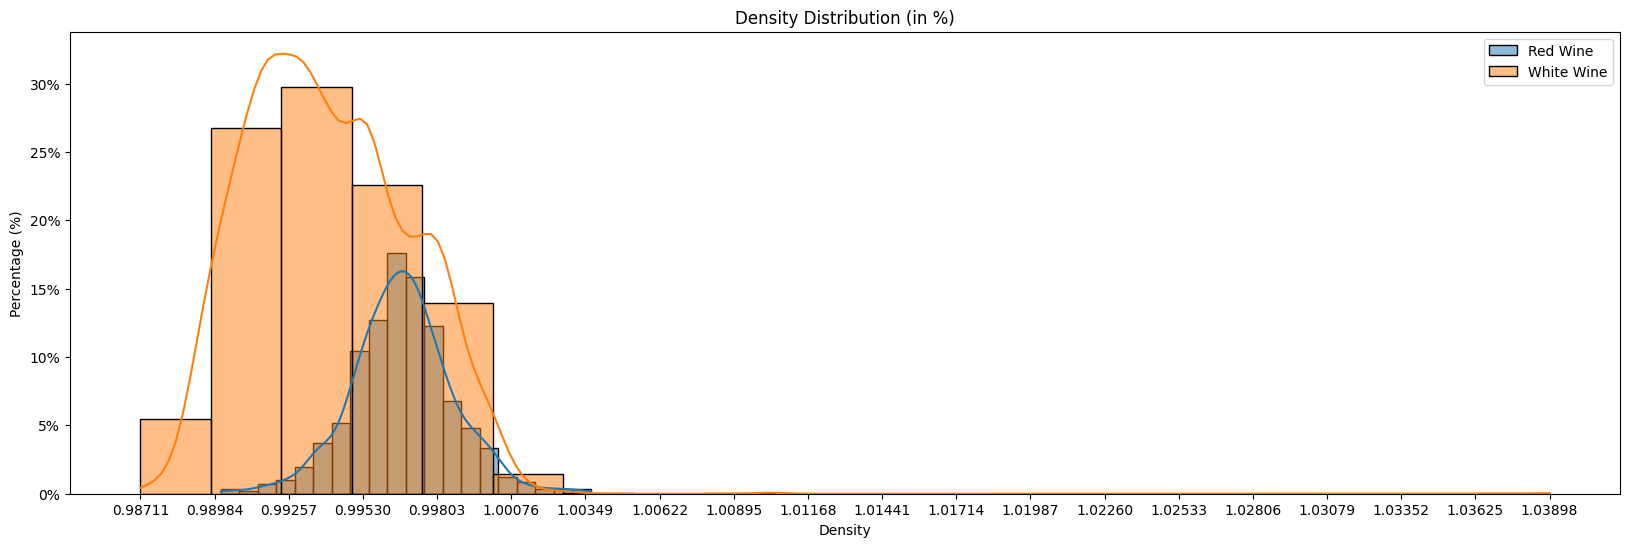

In [45]:
plt.figure(figsize=(20, 6))

sns.histplot(red["density"], bins=20, alpha=0.5, label='Red Wine', kde=True, stat='probability')
sns.histplot(white["density"], bins=20, alpha=0.5, label='White Wine', kde=True, stat='probability')

x_ticks = np.linspace(min(red["density"].min(), white["density"].min()),
                      max(red["density"].max(), white["density"].max()), 20)
plt.xticks(x_ticks)

plt.legend()

plt.title("Density Distribution (in %)")
plt.xlabel("Density")
plt.ylabel("Percentage (%)")

# Moltiplica l'asse y per 100 per esprimere in percentuale
yticks = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'{int(tick * 100)}%' for tick in yticks])

plt.show()

In [17]:
red_quality = red['quality'].values
white_quality = white['quality'].values

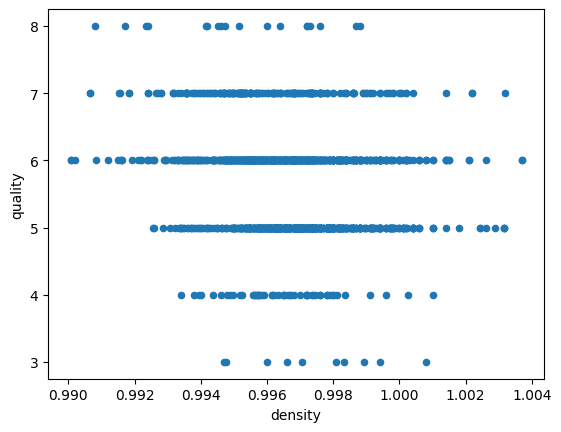

In [18]:
red.plot.scatter("density", "quality");